Dataset : Adult Income Dataset

Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [8]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [9]:
df['income'].value_counts()

,count
income,
0,37155
1,11687


1. Applying Cross-Validation to Random Forest Classifier
Exercise: Implement a random forest classifier and evaluate the model using k-fold cross-validation. Analyze the cross-validation scores to assess model stability.

In [4]:
# Separating features and target
X = df.drop('income', axis=1)
y = df['income']

In [5]:
# Standardize numerical features
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [6]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Apply K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(rf_clf, X, y, cv=kf, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.85740608 0.85628007 0.85288698 0.85995086 0.85708436]
Mean CV Score: 0.8567216689977464


2. Exercise: Train a gradient boosting classifier with varying numbers of estimators and learning rates. Evaluate the model for overfitting and underfitting by comparing training and validation performance.

In [7]:
# Define the parameters to test
n_estimators_list = [10, 50, 100, 200]
learning_rates = [0.01, 0.1, 0.2, 0.5]

# Initialize lists to store results
train_scores = []
val_scores = []

# Initialize cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [8]:
# Train the models and record the accuracies
for n_estimators in n_estimators_list:
    for learning_rate in learning_rates:
        gbc = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
        gbc.fit(X, y)

In [9]:
        # Training score
        train_score = accuracy_score(y, gbc.predict(X))
        train_scores.append((n_estimators, learning_rate, train_score))

        # Validation score using cross-validation
        val_score = cross_val_score(gbc, X, y, cv=kf, scoring='accuracy').mean()
        val_scores.append((n_estimators, learning_rate, val_score))

In [16]:
# Convert results to DataFrame
train_df = pd.DataFrame(train_scores, columns=['n_estimators', 'learning_rate', 'train_scores'])
val_df = pd.DataFrame(val_scores, columns=['n_estimators', 'learning_rate', 'val_scores'])
print('Training Scores:')
print(train_df)
print('\nValidation Scores:')
print(val_df)

Training Scores:
   n_estimators  learning_rate  train_scores
0           200            0.5      0.892122

Validation Scores:
   n_estimators  learning_rate  val_scores
0           200            0.5     0.87048


3. Exercise: Implement a random forest classifier and calculate precision, recall, and F1-score. Discuss the
trade-offs between these metrics and their importance for classification tasks.

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
rf_pred = rf_clf.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)

print("Random Forest Classifier:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Random Forest Classifier:
Precision: 0.747599451303155
Recall: 0.6374269005847953
F1-Score: 0.6881313131313131


4. Exercise: Implement a gradient boosting classifier and plot the ROC curve. Compute the AUC and interpret how well the model distinguishes between classes.

In [18]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_probs = gb_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

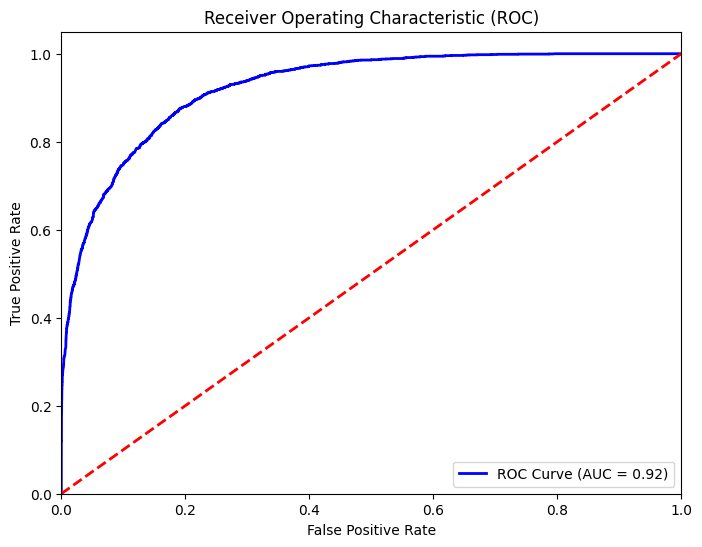

ROC AUC: 0.92


In [19]:
# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print(f"ROC AUC: {roc_auc:.2f}")

5. Exercise: Compare the performance of different classifiers (e.g., SVM, random forest, gradient boosting) using cross-validation. Evaluate and compare the models based on accuracy, precision, recall, F1-score, and ROC-AUC.

In [10]:
# defining Classifier

classifiers ={
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier()
}

# Prepare for metrics collection
# Evaluate each classifier using cross-validation
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {name: {metric: [] for metric in metrics} for name in classifiers.keys()}

In [ ]:
# Cross-validation for each model
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        y_pred_prob = clf.predict_proba(X_val)[:, 1] if hasattr(clf, 'predict_proba') else None

In [ ]:
results[name]['accuracy'].append(accuracy_score(y_val, y_pred))
        results[name]['precision'].append(precision_score(y_val, y_pred, average='binary'))
        results[name]['recall'].append(recall_score(y_val, y_pred, average='binary'))
        results[name]['f1'].append(f1_score(y_val, y_pred, average='binary'))
        if y_pred_prob is not None:
            results[name]['roc_auc'].append(roc_auc_score(y_val, y_pred_prob))

In [ ]:
# Print classification report
    print(f"{name} Classification Report:\n", classification_report(y_val, y_pred))

# Print summary results
print("\nPerformance Summary:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, scores in metrics.items():
        if scores:  # Ensuring scores is greater than 0 before calculating the mean
            print(f"Average {metric.capitalize()}: {sum(scores) / len(scores):.2f}")
        else:
            print(f"Average {metric.capitalize()}: No scores to report")
